# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import boxplot

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv(('Temp_States.csv'), engine = 'python')
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
temp.loc[temp["State"]=="New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
temp_ny = temp.loc[temp["State"]=="New York"]
round(temp_ny['Temperature'].mean(),6)

10.740741

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp[temp['Temperature'] >= 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
### No entiendo bien en que se diferencia de la de arriba

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
temp[(temp.Temperature >= 15)&(temp.Temperature <= 20)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
6,Newark,New Jersey,20.000000


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
def T_mean(x):
    temp_mean = temp.loc[temp["State"]==x]
    return print(f"the average temperature in {x} is:", round(temp_mean['Temperature'].mean(),6))
    

In [11]:
T_mean("New York")
T_mean("Connecticut")
T_mean("New Jersey")

the average temperature in New York is: 10.740741
the average temperature in Connecticut is: 15.833333
the average temperature in New Jersey is: 21.111111


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
employee = pd.read_csv(('employee.csv'), engine = 'python')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [13]:
# solo se me ocurre comentar que los valores númericos en el caso de "temp" son float64(decimales) 
# y en "employees" son int64 (enteros)
print(employee.dtypes)
print("____________________________")
print(temp.dtypes)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object
____________________________
City            object
State           object
Temperature    float64
dtype: object


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

(array([1., 3., 1., 0., 1., 0., 0., 0., 1., 2.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

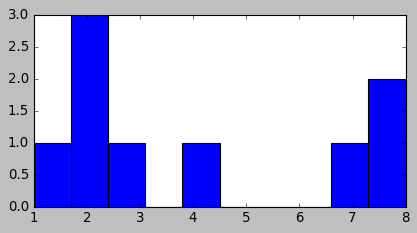

In [14]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [6,3]
plt.hist(employee["Years"])

#### What's the average salary in this company?

In [15]:
round(employee['Salary'].mean(),2)

48.89

#### What's the highest salary?

In [16]:
print(employee[employee.Salary == employee.Salary.max()]) 

     Name Department Education Gender Title  Years  Salary
6  Carlos         IT    Master      M    VP      8      70
8     Ana         HR    Master      F    VP      8      70


#### What's the lowest salary?

In [17]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [18]:
l_salaries = (employee.loc[:, ['Name',"Salary"]])
l_salaries[l_salaries.Salary == l_salaries.Salary.min()]

,Name,Salary
1,Maria,30
2,David,30


#### Could you give all the information about an employee called David?

In [19]:
# your answer here
employee[employee.Name == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [20]:
salaries = (employee.loc[:, ['Name',"Salary"]])
salaries[(salaries.Name == "David")&(salaries.Salary == salaries.Salary)]

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [21]:
employee[(employee.Title == "associate")]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [22]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [23]:
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [24]:
employee[(employee.Title == "associate")&(employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [25]:
groups = employee.groupby('Years')
groups.mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [26]:
title = employee.groupby('Title')
title.mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

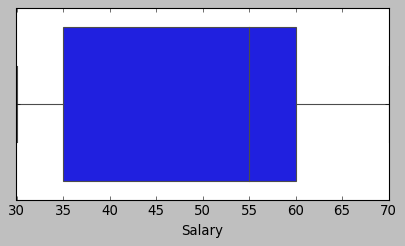

In [109]:
sns.boxplot(employee["Salary"])

In [106]:
description = employee.describe()

In [110]:
# print first quartile here
description.iloc[[4]]

,Years,Salary
25%,2.0,35.0


In [111]:
# print third quartile here
description.iloc[[6]]

,Years,Salary
75%,7.0,60.0


#### Is the mean salary per gender different?

In [30]:
gender = employee.groupby('Gender')
gender.mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [119]:
employee.groupby("Department").mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [120]:
employee.groupby("Department").max()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Sonia,Master,M,analyst,8,70
IT,Pedro,Phd,M,associate,8,70
Sales,Samuel,Master,M,associate,3,55


In [124]:
employee.groupby(by=["Department"]).min()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Ana,Bachelor,F,VP,2,30
IT,Carlos,Bachelor,F,VP,1,30
Sales,Eva,Bachelor,F,associate,2,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [31]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [32]:
import shutil
file = "Orders.zip"
shutil.unpack_archive(file)


In [33]:
orders = pd.read_csv(('Orders.csv'), engine = 'python')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [34]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [35]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [36]:
round(orders['UnitPrice'].mean(),2)

3.12

#### What were the highest and lowest purchase prices? 

In [37]:
orders['UnitPrice'].max()

8142.75

In [38]:
orders['UnitPrice'].min()

0.0

#### Select all the customers we have in Spain

In [39]:
orders[(orders.Country == "Spain")&(orders.CustomerID == orders.CustomerID)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [40]:
orders["Country"].value_counts().head(5)

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [41]:
bought = (orders.loc[:, ['CustomerID',"Quantity"]])
bought[bought.Quantity >= 50].head()

,CustomerID,Quantity
46,13748,80
83,15291,64
96,14688,120
102,14688,96
146,16098,50


#### Select orders from Spain that are above 50 items

In [42]:
orders[(orders.Country == "Spain")&(orders.Quantity > 50)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [43]:
orders[orders.UnitPrice == 0.0].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [44]:
#orders[orders['Description'].str.contains("lunch bag", case=False)].head()
orders[orders.Description.str.contains("lunch bag", case=False)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [45]:
orders[(orders.Description.str.contains("lunch bag", case=False))&(orders.InvoiceDate.str.contains("2011",case=False))].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

In [46]:
#orders[(orders.Country == "Spain")&(orders.amount_spent.value_counts())].head()
spain = orders[orders.Country == "Spain"]
spain['amount_spent'].head()

4250    115.5
4251    145.0
4252     99.0
4253    115.5
4254    145.0
Name: amount_spent, dtype: float64

#### Select all orders made in the month of August

In [47]:
orders[orders.InvoiceDate.str.contains("-08-",case=False)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [48]:
august = orders[orders.InvoiceDate.str.contains("-08-",case=False)]
len(august["InvoiceDate"])

27013

#### What's the  average amount of money spent by country

In [80]:
average_country = (orders.loc[:, ['Country',"amount_spent"]])
average_country.groupby(by=["Country","Country"]).mean().head(8)

,,amount_spent
Country,Country,
Australia,Australia,116.895620
Austria,Austria,25.624824
Bahrain,Bahrain,32.258824
Belgium,Belgium,20.283772
Brazil,Brazil,35.737500
Canada,Canada,24.280662
Channel Islands,Channel Islands,27.340160
Cyprus,Cyprus,22.134169


#### What's the most expensive item?

In [78]:
expensive = (orders.loc[:, ['Description',"UnitPrice"]])
expensive.groupby(by=["Description","UnitPrice"]).max().head()

Empty DataFrame
Columns: []
Index: [( 4 purple flock dinner candles, 0.79), ( 4 purple flock dinner candles, 2.55), ( 50's christmas gift bag large, 1.04), ( 50's christmas gift bag large, 1.25), ( dolly girl beaker, 1.08)]

#### What was the average amount spent per year ?

In [96]:
mean_year = (orders.loc[:, ['year',"amount_spent"]])

In [97]:
mean_year.groupby("year").mean()

,amount_spent
year,
2010,21.892733
2011,22.430074
